<a href="https://colab.research.google.com/github/lalitha-sahitya/Dog-vs-Cat-Classification/blob/main/Dog_and_Cat_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

In [2]:
!pip install opendatasets

In [3]:
import opendatasets as od
od.download('https://www.kaggle.com/competitions/dogs-vs-cats')

Skipping, found downloaded files in "./dogs-vs-cats" (use force=True to force download)


In [4]:
os.listdir('dogs-vs-cats')

['test1.zip', 'train.zip', 'sampleSubmission.csv']

In [5]:
import pandas as pd

In [6]:
from zipfile import ZipFile
dataset='//content/dogs-vs-cats/train.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('done')

done


In [7]:
file_list=os.listdir('train')
file_list

['dog.2373.jpg',
 'cat.5980.jpg',
 'dog.11837.jpg',
 'cat.5662.jpg',
 'cat.12108.jpg',
 'dog.11957.jpg',
 'dog.7016.jpg',
 'cat.10988.jpg',
 'dog.2906.jpg',
 'dog.3852.jpg',
 'cat.5808.jpg',
 'cat.1073.jpg',
 'dog.9365.jpg',
 'dog.8018.jpg',
 'dog.10621.jpg',
 'dog.6140.jpg',
 'cat.12225.jpg',
 'cat.2621.jpg',
 'dog.6497.jpg',
 'dog.2812.jpg',
 'cat.11063.jpg',
 'cat.11258.jpg',
 'cat.2730.jpg',
 'cat.1614.jpg',
 'cat.12038.jpg',
 'cat.4063.jpg',
 'cat.1668.jpg',
 'cat.428.jpg',
 'dog.8719.jpg',
 'cat.1351.jpg',
 'dog.10850.jpg',
 'dog.6443.jpg',
 'dog.1389.jpg',
 'dog.5046.jpg',
 'cat.2586.jpg',
 'dog.10493.jpg',
 'dog.1551.jpg',
 'dog.10411.jpg',
 'dog.3169.jpg',
 'dog.6911.jpg',
 'dog.3653.jpg',
 'dog.4130.jpg',
 'dog.219.jpg',
 'dog.7420.jpg',
 'dog.4630.jpg',
 'dog.8093.jpg',
 'cat.5257.jpg',
 'cat.1030.jpg',
 'dog.12384.jpg',
 'dog.2239.jpg',
 'dog.10823.jpg',
 'cat.12263.jpg',
 'cat.11539.jpg',
 'dog.5424.jpg',
 'dog.8941.jpg',
 'dog.10577.jpg',
 'dog.6865.jpg',
 'dog.3450.jpg',

In [8]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
from google.colab.patches import cv2_imshow

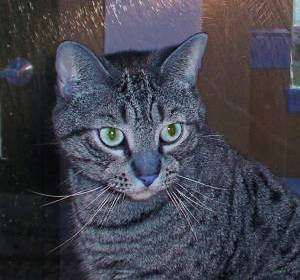

In [11]:
img=mpimg.imread('train/cat.1.jpg')
cv2_imshow(img)

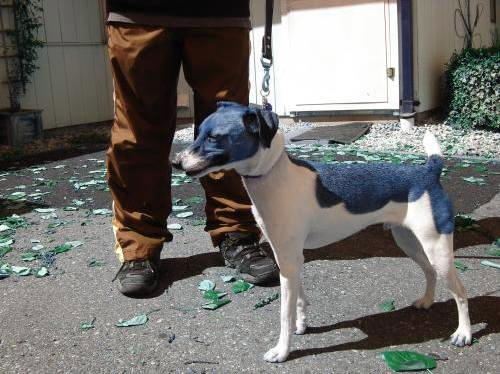

In [12]:
img=mpimg.imread('/content/train/dog.4023.jpg')
cv2_imshow(img)

In [13]:
file_list=os.listdir('/content/train')
c=0
d=0
for i in range(len(file_list)):
  if 'cat' in file_list[i]:
    c+=1
  if 'dog' in file_list[i]:
    d+=1

In [14]:
c

12500

In [15]:
d

12500

In [17]:
#os.mkdir('/content/img_resized')

In [18]:
original_folder='/content/train/'
resized_folder='/content/img_resized/'
for i in range(2000):
  file_name=os.listdir(original_folder)[i]
  img_path=original_folder+file_name
  img=Image.open(img_path)
  img=img.resize((224,224))
  img=img.convert('RGB')
  img.save(resized_folder+file_name)

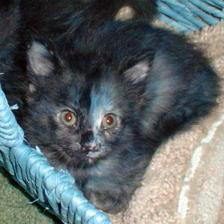

In [19]:
img=mpimg.imread('/content/img_resized/cat.10030.jpg')
cv2_imshow(img)

In [20]:
filenames=os.listdir('/content/img_resized/')
labels=[]
for i in range(2000):
  filename=filenames[i]
  if 'cat' in filename:
    labels.append(0)
  else:
    labels.append(1)

In [21]:
len(filenames)

2000

In [22]:
filenames[:5]

['dog.2373.jpg',
 'cat.5980.jpg',
 'dog.11837.jpg',
 'cat.5662.jpg',
 'cat.12108.jpg']

In [23]:
len(labels)

2000

In [24]:
labels[:5]

[1, 0, 1, 0, 0]

In [25]:
values,counts=np.unique(labels,return_counts=True)

In [26]:
values

array([0, 1])

In [27]:
counts

array([1018,  982])

resized to numpy arrays

In [32]:
import cv2
import glob

In [35]:
image_directory='/content/img_resized'
files=[]
[files.extend(glob.glob(f'{image_directory}/*.jpg'))]
dog_cat_images = np.asarray([cv2.imread(file) for file in files if cv2.imread(file) is not None])

In [36]:
dog_cat_images

array([[[[163, 136, 102],
         [165, 138, 104],
         [164, 137, 103],
         ...,
         [122, 120,  85],
         [124, 122,  87],
         [130, 130,  94]],

        [[163, 136, 102],
         [166, 139, 105],
         [166, 139, 105],
         ...,
         [127, 123,  88],
         [122, 120,  85],
         [125, 125,  89]],

        [[164, 137, 103],
         [167, 140, 106],
         [168, 141, 107],
         ...,
         [125, 120,  87],
         [114, 109,  76],
         [112, 110,  76]],

        ...,

        [[ 47,  81,  51],
         [ 36,  70,  39],
         [ 17,  51,  20],
         ...,
         [ 41,  63,  39],
         [ 38,  57,  36],
         [ 29,  48,  27]],

        [[ 42,  76,  46],
         [ 48,  82,  51],
         [ 37,  71,  40],
         ...,
         [ 39,  61,  37],
         [ 36,  55,  34],
         [ 32,  48,  30]],

        [[ 21,  55,  25],
         [ 46,  80,  49],
         [ 49,  83,  52],
         ...,
         [ 36,  58,  34],
        

In [38]:
dog_cat_images.shape

(2000, 224, 224, 3)

len,shape,rgb

In [39]:
x=dog_cat_images
y=np.array(labels)

array([[[163, 136, 102],
        [165, 138, 104],
        [164, 137, 103],
        ...,
        [122, 120,  85],
        [124, 122,  87],
        [130, 130,  94]],

       [[163, 136, 102],
        [166, 139, 105],
        [166, 139, 105],
        ...,
        [127, 123,  88],
        [122, 120,  85],
        [125, 125,  89]],

       [[164, 137, 103],
        [167, 140, 106],
        [168, 141, 107],
        ...,
        [125, 120,  87],
        [114, 109,  76],
        [112, 110,  76]],

       ...,

       [[ 47,  81,  51],
        [ 36,  70,  39],
        [ 17,  51,  20],
        ...,
        [ 41,  63,  39],
        [ 38,  57,  36],
        [ 29,  48,  27]],

       [[ 42,  76,  46],
        [ 48,  82,  51],
        [ 37,  71,  40],
        ...,
        [ 39,  61,  37],
        [ 36,  55,  34],
        [ 32,  48,  30]],

       [[ 21,  55,  25],
        [ 46,  80,  49],
        [ 49,  83,  52],
        ...,
        [ 36,  58,  34],
        [ 37,  54,  33],
        [ 34,  50,  32]]], dtype=uint8)
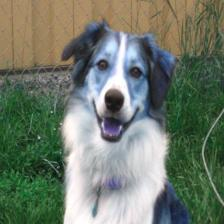

In [40]:
x[0]

In [41]:
y[0]

1

In [ ]:
from sklearn.model_selection import train_test_split

In [42]:
x_t,x_te,y_t,y_te=train_test_split(x,y,test_size=0.2,random_state=42)